In [30]:
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

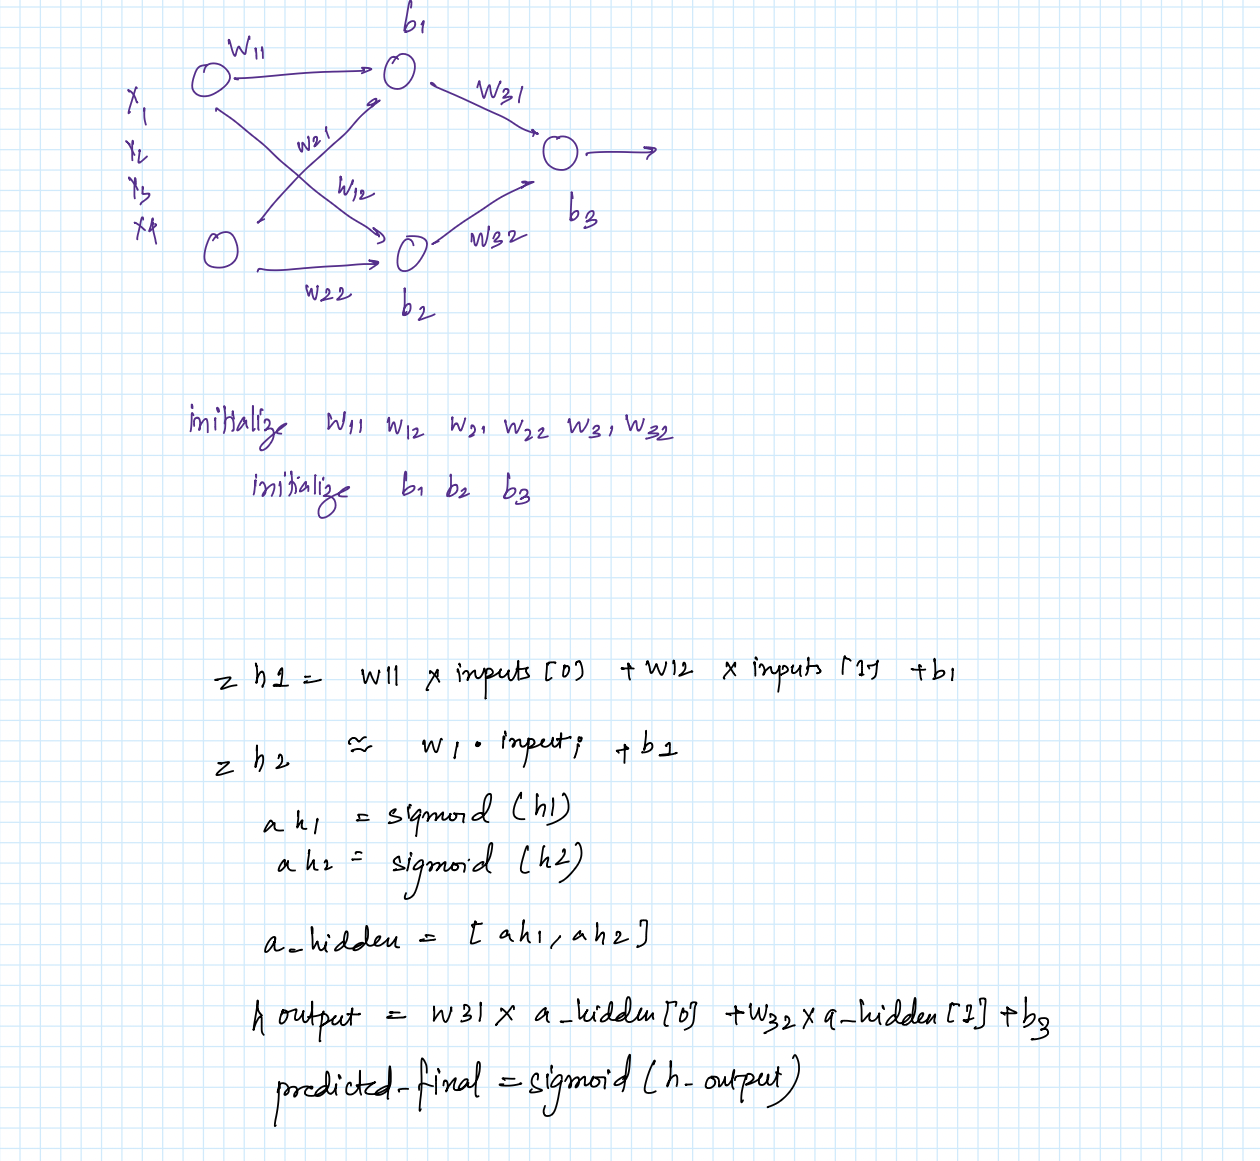

In [31]:
w11, w12 = 10,10
w21, w22 = -10,-10
w31, w32 = 10,10
b1, b2, b3 = -5,15,-15

In [32]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

In [33]:
def forward(input):
    h1 = w11 * input[0] + w12 * input[1] + b1
    h2 = w21 * input[0] + w22 * input[1] + b2

    a_h1 = sigmoid(h1)
    a_h2 = sigmoid(h2)

    a_hidden = np.array([a_h1, a_h2])

    h_output = w31 * a_hidden[0] + w32 * a_hidden[1] + b3
    predicted_forward = sigmoid(h_output)
    return predicted_forward, a_hidden

In [34]:
input = [0,1]

In [35]:
print(forward(input))

(0.9923558641717396, array([0.99330715, 0.99330715]))


In [36]:
predicted, hidden = forward(input)

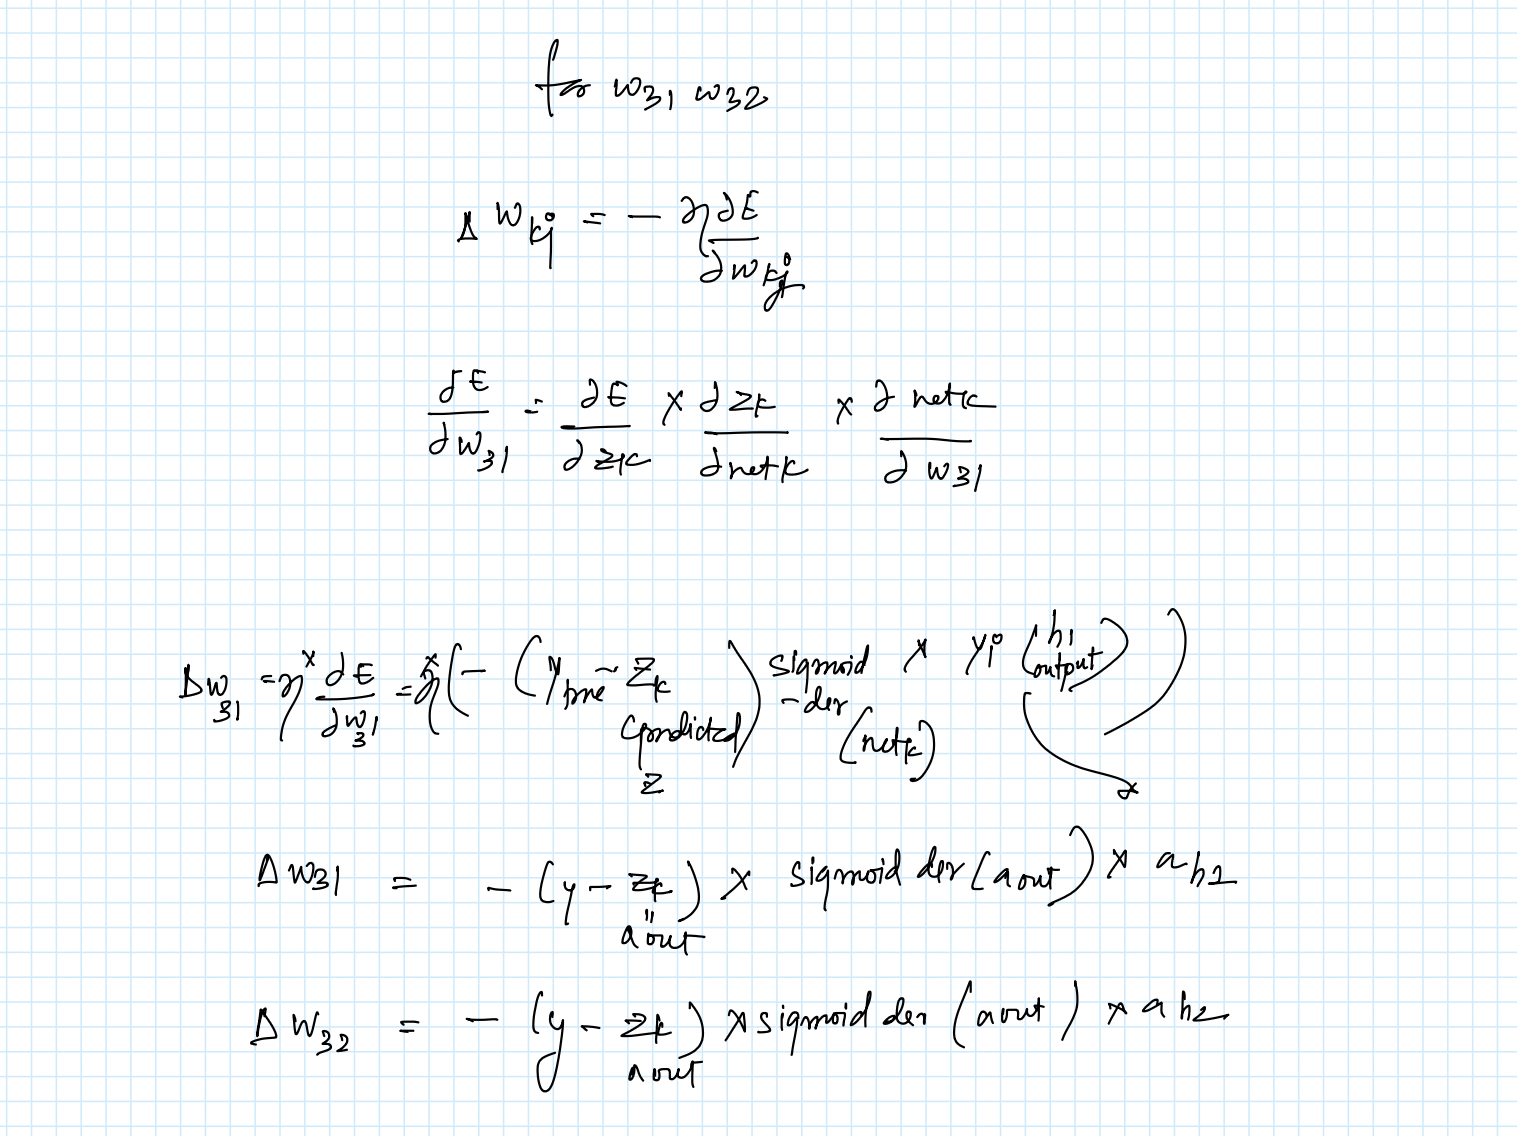

In [37]:
def sigmoid_derivative(z):
    result = z * (1-z)
    return result

In [38]:
dw31 = -1 * (y - predicted) * sigmoid_derivative(predicted) * hidden[0]
dw32 = -1 * (y - predicted) * sigmoid_derivative(predicted) * hidden[1]
db3 = sigmoid_derivative(predicted)

dw31,dw32,db3

(array([ 7.47733498e-03, -5.75980516e-05, -5.75980516e-05,  7.47733498e-03]),
 array([ 7.47733498e-03, -5.75980516e-05, -5.75980516e-05,  7.47733498e-03]),
 0.007585703015699507)

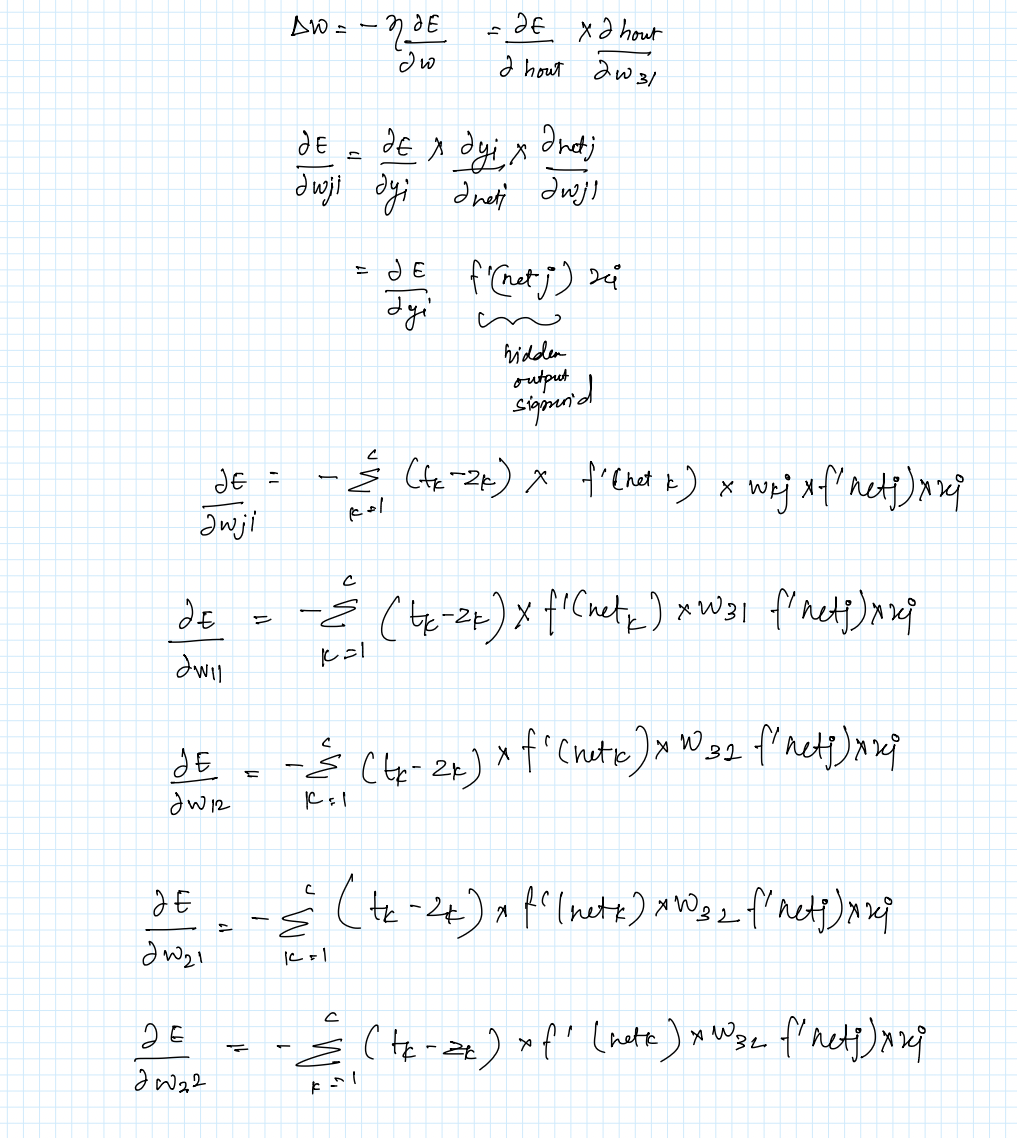

In [39]:
dw11 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w31 * sigmoid_derivative(hidden[0]) *input[0]
dw12 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w31 * sigmoid_derivative(hidden[0]) *input[1]
dw21 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w32 * sigmoid_derivative(hidden[0]) *input[0]
dw22 = -1 * (y - predicted) * sigmoid_derivative(predicted) * w32 * sigmoid_derivative(hidden[0]) *input[1]
db1 = (y - predicted) * sigmoid_derivative(predicted) * w31 * sigmoid_derivative(hidden[0])
db2 = (y - predicted) * sigmoid_derivative(predicted) * w31 * sigmoid_derivative(hidden[0])

dw11,dw12,dw21,dw22, db1,db2

(array([ 0., -0., -0.,  0.]),
 array([ 5.00446884e-04, -3.85495173e-06, -3.85495173e-06,  5.00446884e-04]),
 array([ 0., -0., -0.,  0.]),
 array([ 5.00446884e-04, -3.85495173e-06, -3.85495173e-06,  5.00446884e-04]),
 array([-5.00446884e-04,  3.85495173e-06,  3.85495173e-06, -5.00446884e-04]),
 array([-5.00446884e-04,  3.85495173e-06,  3.85495173e-06, -5.00446884e-04]))

In [40]:
eta = 0.1

In [41]:
w31 += eta * dw31
w32 += eta * dw32
w11 += eta * dw11
w12 += eta * dw12
w21 += eta * dw21
w22 += eta * dw22

b1+=eta*db1
b2+=eta*db2
b3+=eta*db2